In [1]:
# type: ignore
import pandas as pd 
import numpy as np
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow.python'

In [2]:
# type: ignore
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


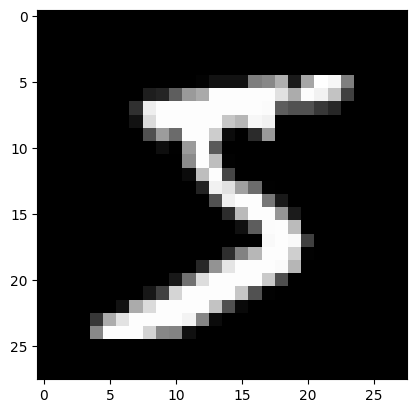

In [5]:
#type: ignore
from matplotlib import pyplot as plt
plt.imshow(x_train[0],cmap='gray')
plt.show()


In [6]:
y_train[0]

5

In [7]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
x_train = x_train / 255.0
x_test = x_test/ 255.0

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
#type: ignore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])



c:\Users\suhas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train, y_train, 
    batch_size=64, 
    epochs=5, 
    validation_split=0.2, 
    verbose=1
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7832 - loss: 0.6668 - val_accuracy: 0.9756 - val_loss: 0.0848
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9601 - loss: 0.1291 - val_accuracy: 0.9842 - val_loss: 0.0503
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9717 - loss: 0.0975 - val_accuracy: 0.9862 - val_loss: 0.0469
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9773 - loss: 0.0763 - val_accuracy: 0.9866 - val_loss: 0.0475
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9790 - loss: 0.0698 - val_accuracy: 0.9896 - val_loss: 0.0353


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


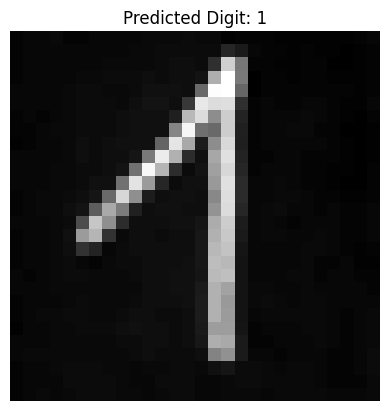

In [13]:
#type: ignore
from PIL import Image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L') 
    img = img.resize((28, 28))  
    img_array = np.array(img)  
    img_array = 255 - img_array  
    img_array = img_array / 255.0  
    img_array = img_array.reshape(1, 28, 28, 1)  
    return img_array

image_path = input("Enter the path to your MNIST-like image: ")
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)


plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


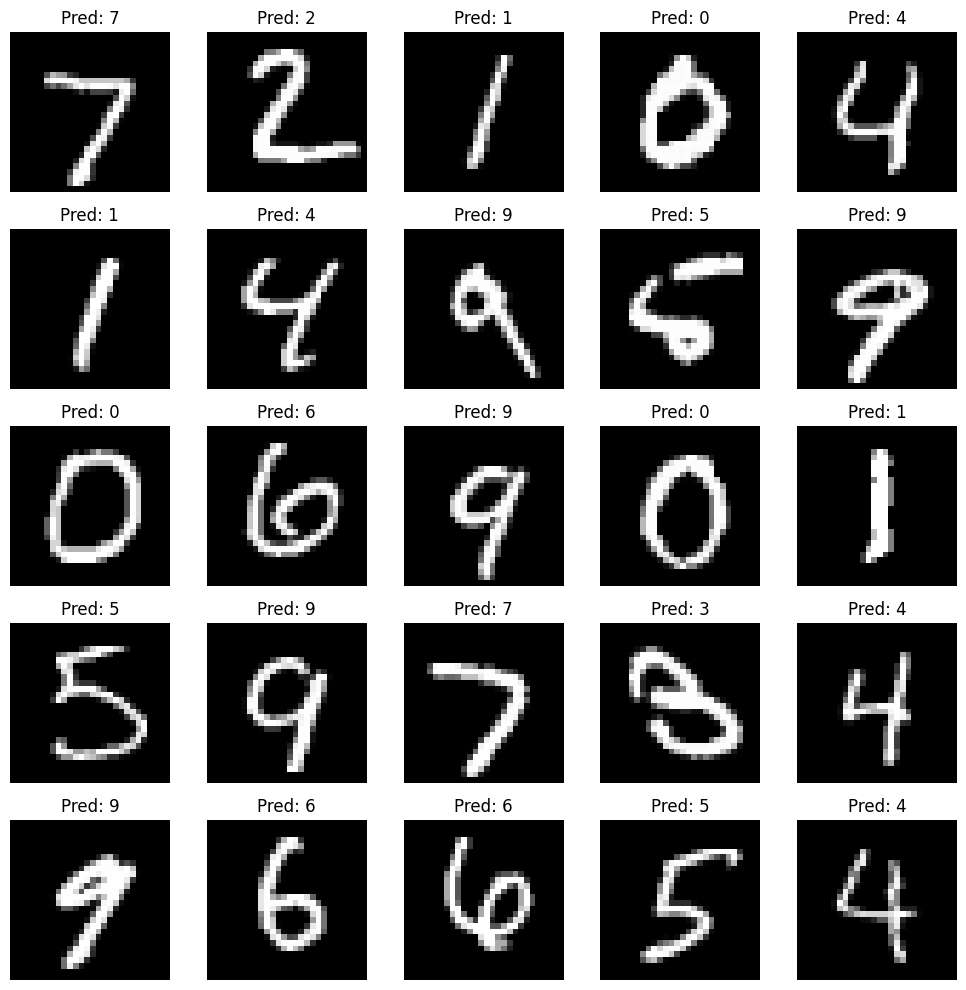

In [14]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)  
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off') 
plt.tight_layout()
plt.show()
